# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Use the shape attribute to get the number of rows and colums
num_rows, num_cols = df.shape
print("The number of rows is:", num_rows)
print("The number of columns is:", num_cols)


The number of rows is: 1898
The number of columns is: 9


#### Observations:
By using the `shape` attribute of `pandas.DataFrame`, we can see that there are 1898 rows and 9 columns. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
By using `df.info()`, we can see the data has 3 different datatypes:
- 1 column of type float64, which is a 64-bit floating point number
- 4 columns of type int64, which is a 64-bit integer
- 4 columns of type object, which is often used to store string values

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Loop through each object-type column and print the unique values
for col in df.select_dtypes(include=['object']):
    print(col)
    print(df[col].unique())
    print()

restaurant_name
['Hangawi' 'Blue Ribbon Sushi Izakaya' 'Cafe Habana'
 'Blue Ribbon Fried Chicken' 'Dirty Bird to Go' 'Tamarind TriBeCa'
 'The Meatball Shop' 'Barbounia' 'Anjappar Chettinad' 'Bukhara Grill'
 'Big Wong Restaurant \x8c_¤¾Ñ¼' 'Empanada Mama (closed)' 'Pylos'
 "Lucky's Famous Burgers" 'Shake Shack' 'Sushi of Gari' 'RedFarm Hudson'
 'Blue Ribbon Sushi' 'Five Guys Burgers and Fries' 'Tortaria'
 'Cafe Mogador' 'Otto Enoteca Pizzeria' 'Vezzo Thin Crust Pizza'
 'Sushi of Gari 46' 'The Kati Roll Company' 'Klong' '5 Napkin Burger'
 'TAO' 'Parm' 'Sushi Samba' 'Haru Gramercy Park'
 'Chipotle Mexican Grill $1.99 Delivery' 'RedFarm Broadway' 'Cafeteria'
 'DuMont Burger' "Sarabeth's East" 'Hill Country Fried Chicken' 'Bistango'
 "Jack's Wife Freda" "Mamoun's Falafel" 'Prosperity Dumpling'
 'Blue Ribbon Sushi Bar & Grill' 'Westville Hudson' 'Blue Ribbon Brooklyn'
 'Nobu Next Door' 'Osteria Morini' 'Haandi' 'Benihana' 'Han Dynasty'
 'Chote Nawab' 'Mission Cantina' "Xi'an Famous Foods" 'R

#### Observations:
Based on the output of `df.info()` from the previous question, we can see that the Non-Null Count is the same as the total number of rows, for each of the columns. This implies that there is no missing data. However, the above code allows us to look at all the unique values of each of those columns. We can see that for `rating` we have a unique value of 'Not given', indiciating missing ratings. We need to handle this. We can handle this by replacing these values with `NaN` values, with the following code below:

In [7]:
# Replace all 'Not given' values in column 'rating' with NaN, and make the changes in the original dataframe df, then print the unique values
df['rating'].replace('Not given', np.nan, inplace=True)
print(df['rating'].unique())

[nan '5' '3' '4']


#### Observations:
After executing the code, we can look again at the unique values for column `rating`. We see that the 'Not given' rating values have now been replaced with 'NaN'. Now also for future use in analysis that follows, it might be useful and appropriate to convert `rating` types to be of type float, rather than string objects, since they do represent numerical ratings up to 5. We can do this with the following code:


In [8]:
# Convert all values in column 'rating' to be float-type
df['rating'] = df['rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


From calling `info()` on our dataframe, we can see that the column for `rating` has now been changed from `object` to `float64`.  

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [9]:
# Get summary statistics on column 'food_preparation_time'
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
Based on the output of the `describe()` function on the `food_preparation_time` column, we can see:

- min: 20 minutes
- average: 27.371970 minutes
- max: 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [27]:
# Sum up the numbers of rows that have missing or NaN values in column 'rating'
df['rating'].isna().sum()

736

#### Observations:
We can use `isna()` to find and sum up how many orders are have the NaN value we assigned before. According to the output: 736 orders are not rated. 


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on Restaurant Name**

`restaurant_name` is a categorical variable that represents the name of the restaurant that received the food ordere. We can perform univariate analysis on this column to look for any insights into the frequency of orders placed at each restaurant and possibly infer which restaurants are more popular.

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this to show the number of orders placed at each restraunt. This can give us a visual representation on the more popular restaurant and the less popular restaurants.

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


c:\Users\BD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\BD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


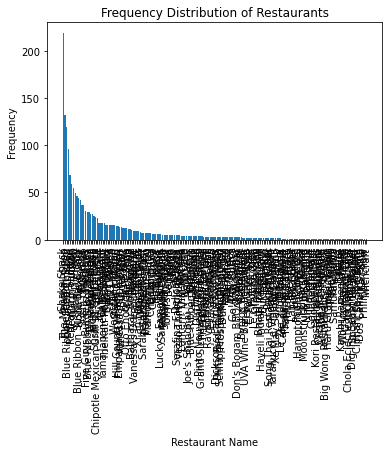

In [11]:
# Create a frequency distribution of the restaurant_name column
restaurant_counts = df['restaurant_name'].value_counts()

# Print the frequency distribution table
print(restaurant_counts)

# Create a bar chart of the frequency distribution
plt.bar(restaurant_counts.index, restaurant_counts.values)
plt.xlabel('Restaurant Name')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Restaurants')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the frequency distribution, it clearly looks like certain restaurants are more popular than others. Just looking at this frequency of orders, it looks like some of the restaurants further to the right are not significantly different in their order count.

Let us look further into this and look at the percentage distribution. The percentage distribution can show the percentage of food orders placed at each restaurant, based on their market share among the customers. This can help identify the most popular restaurants and the ones that are less popular, based on the percentage of orders they receive relative to the other restaurants in the dataset.

Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
                               ...    
Sushi Choshi                  0.052687
Dos Caminos Soho              0.052687
La Follia                     0.052687
Philippe Chow                 0.052687
'wichcraft                    0.052687
Name: restaurant_name, Length: 178, dtype: float64


c:\Users\BD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\BD\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


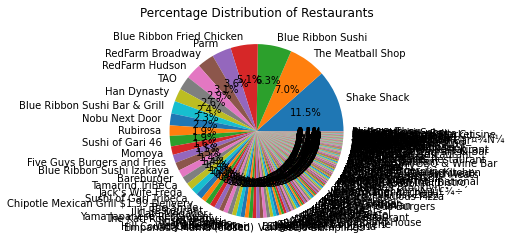

In [12]:
# Create a percentage distribution of the restaurant_name column
restaurant_counts = df['restaurant_name'].value_counts(normalize=True) * 100

# Print the percentage distribution table
print(restaurant_counts)

# Create a pie chart of the percentage distribution
plt.pie(restaurant_counts.values, labels=restaurant_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Restaurants')
plt.show()


#### Observations:
A few restaurant appear to account for a large part of the market share among customers. The top 4 restaurants shown here account for about 30% of the total orders of the dataset. From this we can infer that a few of the most popular restaurants account for a large part of the market share. 

**Observations on Cuisine Type**

`cuisine_type` is a categorical variable that represents the type of cuisine that was ordered by the customer. We can perform univariate analysis on this column to look for any insights into the frequency of each cuisine type and look for any insights into food preferences and tastes of the customers. 

Let us begin by first looking at the frequency distribution.  We can look at a frequency distribution table and create a bar chart from this and help identify the most popular cuisines and also the ones that are less popular. 

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


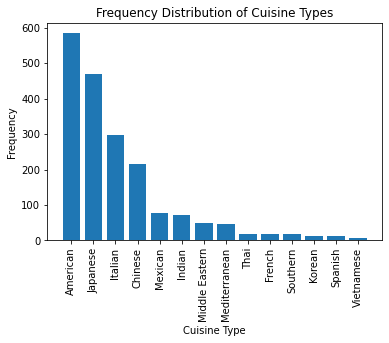

In [13]:
# Create a frequency distribution of the restaurant_name column
cuisine_counts = df['cuisine_type'].value_counts()

# Print the frequency distribution table
print(cuisine_counts)

# Create a bar chart of the frequency distribution
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xlabel('Cuisine Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Cuisine Types')
plt.xticks(rotation=90)
plt.show()

#### Observations:
Based on the frequency distribution, it clearly looks like certain cuisine types are more popular than others. Let us continue and look at the percentage distribution:

American          30.769231
Japanese          24.762908
Italian           15.700738
Chinese           11.327713
Mexican            4.056902
Indian             3.846154
Middle Eastern     2.581665
Mediterranean      2.423604
Thai               1.001054
French             0.948367
Southern           0.895680
Korean             0.684932
Spanish            0.632244
Vietnamese         0.368809
Name: cuisine_type, dtype: float64


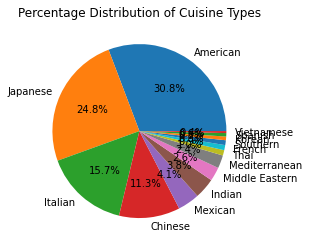

In [14]:
# Create a percentage distribution of the cuisine type column
cuisine_counts = df['cuisine_type'].value_counts(normalize=True) * 100

# Print the percentage distribution table
print(cuisine_counts)

# Create a pie chart of the percentage distribution
plt.pie(cuisine_counts.values, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Cuisine Types')
plt.show()

#### Observations:
Based on the percentage distribution we can see insights that American, Japanese, Italian and Chinese food together account for about 82.6% of the total orders. These are clearly the most popular types of cuisine that dominate the market share. 

**Observations on Cost of the Order**

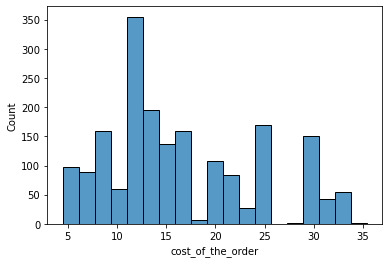

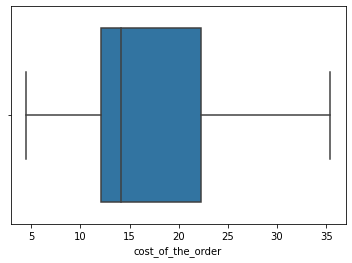

In [15]:
# Create a histogram of the cost_of_the_order column
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()


**Observations on Days of the Week**

In [16]:
# 

**Observations on Food Preparation Time**

**Observations on Delivery Time**

**Observations on Rating**

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Write the code here

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [22]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [23]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [24]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [25]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [26]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---